## exploratory of data 

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_excel("/content/dataset.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape
df.columns=[x.lower().strip().replace(" ","_") for x in df.columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


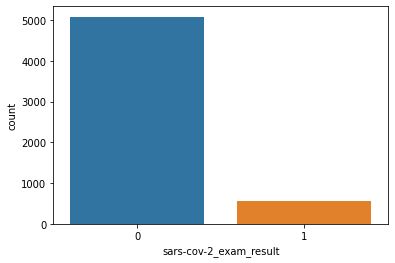

In [ ]:
df['sars-cov-2_exam_result'] = df['sars-cov-2_exam_result'].replace(['negative','positive'], [0,1])
sns.countplot(df['sars-cov-2_exam_result']) #astype("int")
i=df['sars-cov-2_exam_result'].value_counts()

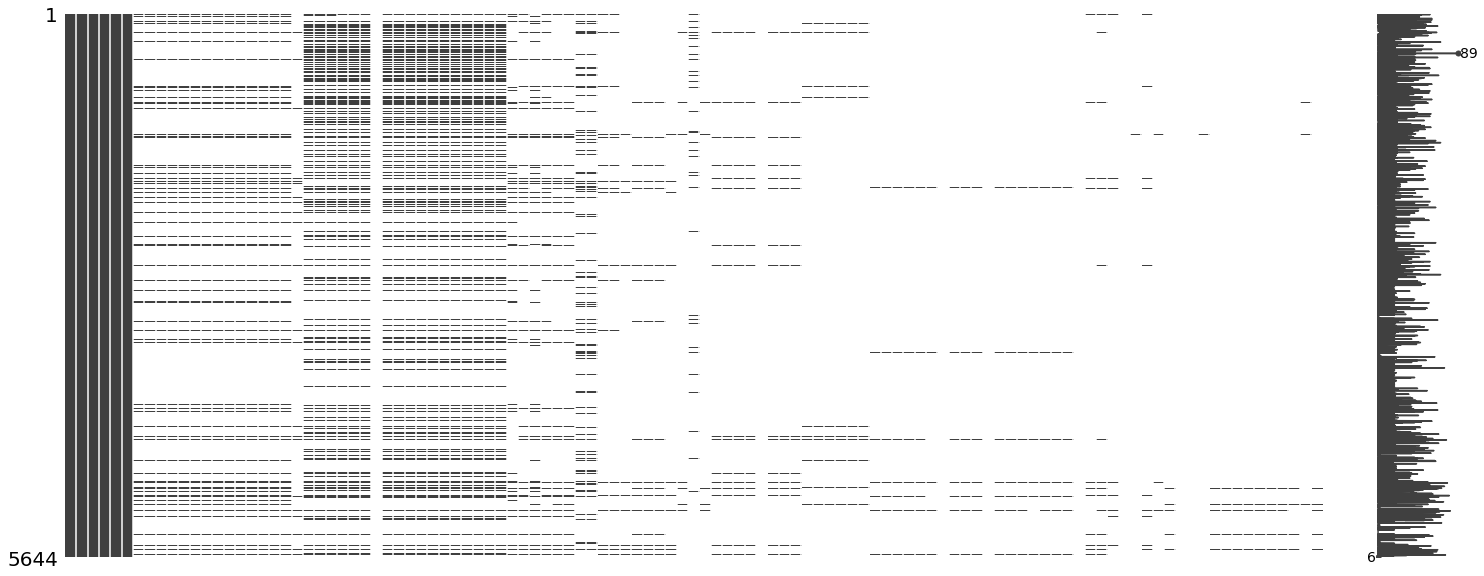

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.drop('patient_id',axis=1,inplace=True)

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
df.replace('not_done',np.nan,inplace=True)

In [ ]:
df.dropna(axis=1,how="all",inplace=True)


In [ ]:
cat=df.select_dtypes('object')
cat.columns.values

array(['respiratory_syncytial_virus', 'influenza_a', 'influenza_b',
       'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus',
       'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae',
       'adenovirus', 'parainfluenza_4', 'coronavirus229e',
       'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis',
       'metapneumovirus', 'parainfluenza_2', 'influenza_b,_rapid_test',
       'influenza_a,_rapid_test', 'strepto_a', 'urine_-_esterase',
       'urine_-_aspect', 'urine_-_ph', 'urine_-_hemoglobin',
       'urine_-_bile_pigments', 'urine_-_ketone_bodies',
       'urine_-_urobilinogen', 'urine_-_protein', 'urine_-_leukocytes',
       'urine_-_crystals', 'urine_-_hyaline_cylinders',
       'urine_-_granular_cylinders', 'urine_-_yeasts', 'urine_-_color'],
      dtype=object)

In [ ]:
df.drop(cat,axis=1,inplace=True)

In [ ]:
df.shape

(1147, 70)

In [ ]:
df.dropna(axis=0,thresh=25,inplace=True)

In [ ]:
df.dropna(axis=1,thresh=100,inplace=True) # thresh is complete coulmns

In [ ]:
"""
for i in df.columns:
    print(i, ' - ', 100*round(df[i].isna().sum()/len(df),3), ' % of missing, having ',len(df)-df[i].isna().sum(),' complete rows.')"""

"\nfor i in df.columns:\n    print(i, ' - ', 100*round(df[i].isna().sum()/len(df),3), ' % of missing, having ',len(df)-df[i].isna().sum(),' complete rows.')"

## imputing ----filling missing data 

In [ ]:
df.shape
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fancyimpute import IterativeImputer

ModuleNotFoundError: ignored

In [ ]:
mice_impute=IterativeImputer()

In [ ]:
df.iloc[:, :] = mice_impute.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


## outlier 

In [ ]:
from sklearn.ensemble import IsolationForest 

In [ ]:
iso_df=IsolationForest()

In [ ]:
iso_df.fit(df)

IsolationForest()

In [ ]:
df['anomaly']=iso_df.predict(df)

In [ ]:
df.drop(df[df['anomaly']==-1].index,inplace = True)

df.drop(columns=["anomaly"], inplace=True)


In [ ]:
df.shape

(391, 43)

In [ ]:
df.columns

Index(['patient_age_quantile', 'sars-cov-2_exam_result',
       'patient_addmited_to_regular_ward_(1=yes,_0=no)',
       'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
       'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)', 'hematocrit',
       'hemoglobin', 'platelets', 'mean_platelet_volume', 'red_blood_cells',
       'lymphocytes', 'mean_corpuscular_hemoglobin_concentration (mchc)',
       'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_(mch)',
       'eosinophils', 'mean_corpuscular_volume_(mcv)', 'monocytes',
       'red_blood_cell_distribution_width_(rdw)', 'serum_glucose',
       'neutrophils', 'urea', 'proteina_c_reativa_mg/dl', 'creatinine',
       'potassium', 'sodium', 'alanine_transaminase', 'aspartate_transaminase',
       'gamma-glutamyltransferase', 'total_bilirubin', 'direct_bilirubin',
       'indirect_bilirubin', 'alkaline_phosphatase',
       'pco2_(venous_blood_gas_analysis)',
       'hb_saturation_(venous_blood_gas_analysis)',
       'base

## balancing 

In [ ]:
y=df[["sars-cov-2_exam_result"]]
y

,sars-cov-2_exam_result
1,0.0
7,0.0
13,0.0
19,0.0
24,0.0
...,...
1139,1.0
1141,0.0
1142,0.0
1143,0.0


In [ ]:
X=df.drop("sars-cov-2_exam_result",axis=1,inplace=True)

In [ ]:
X=df
X

,patient_age_quantile,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,...,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),international_normalized_ratio_(inr),lactic_dehydrogenase,creatine_phosphokinase (cpk)
1,17.0,0.0,0.0,0.0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,-0.130104,0.086105,-0.003211,0.028271,-0.002259,0.049402,-0.000422,-0.358593,-1.583246,0.298632
7,1.0,0.0,1.0,0.0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,...,0.615594,-0.554737,-0.283748,-0.562902,0.104088,-0.855513,0.036345,0.296546,0.907723,-0.267856
13,9.0,0.0,0.0,0.0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,...,0.123770,0.005066,0.136406,-0.156648,-0.008584,0.071917,-0.000863,-0.042972,-0.792007,-0.240915
19,9.0,0.0,0.0,0.0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,...,0.132387,-0.046211,0.101864,-0.264766,-0.005115,0.025922,0.000454,-0.146223,-0.449140,-0.201008
24,9.0,1.0,0.0,0.0,-0.679027,-0.711556,0.952319,-0.886869,-0.321124,-0.875701,...,0.044051,-0.061910,0.168549,0.022162,-0.035542,0.060138,-0.009409,0.314226,-0.400820,0.068948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,18.0,0.0,0.0,0.0,1.197836,1.356092,-1.911774,1.132609,0.384090,0.966573,...,-0.028132,-0.008780,-0.057565,-0.077257,0.002662,-0.004555,0.002579,-0.170730,-0.477429,0.094049
1141,19.0,0.0,0.0,0.0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,...,-0.124672,-0.489130,0.140272,-0.459747,-0.005297,0.108878,0.001272,-0.043446,0.341146,0.734351
1142,15.0,0.0,0.0,0.0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,...,-0.076199,-1.285224,0.553576,-1.101781,0.472572,0.527110,0.488635,-0.439076,1.790529,-0.381008
1143,17.0,0.0,0.0,0.0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,...,0.020652,1.603522,1.645738,2.623225,0.994592,1.197472,1.070151,0.522892,-0.202553,0.078140


In [ ]:


from imblearn.over_sampling import SMOTE
sm =SMOTE()
X_res, y_res =sm.fit_resample(X,y)

In [ ]:
"""from imblearn.combine import SMOTETomek
sm= SMOTETomek(random_state=42)
X_res, y_res =sm.fit_resample(X,y)"""

'from imblearn.combine import SMOTETomek\nsm= SMOTETomek(random_state=42)\nX_res, y_res =sm.fit_resample(X,y)'

In [ ]:
"""from imblearn.over_sampling import BorderlineSMOTE
border_sm=BorderlineSMOTE(random_state=42)
X_res, y_res =border_sm.fit_resample(X,y)
  """

'from imblearn.over_sampling import BorderlineSMOTE\nborder_sm=BorderlineSMOTE(random_state=42)\nX_res, y_res =border_sm.fit_resample(X,y)\n  '

In [ ]:
"""from imblearn.over_sampling import SVMSMOTE
svmsmoter = SVMSMOTE(random_state=42)
X_res, y_res =svmsmoter.fit_resample(X,y)"""

'from imblearn.over_sampling import SVMSMOTE\nsvmsmoter = SVMSMOTE(random_state=42)\nX_res, y_res =svmsmoter.fit_resample(X,y)'

In [ ]:
"""from imblearn.ensemble import RUSBoostClassifier
rusbc = RUSBoostClassifier(random_state=42)
rusbc.fit(X_train, y_train)
preds_sm = pd.DataFrame(rusbc.predict(X_test), columns=['predictions'])
print('Test set Accuracy :',metrics.accuracy_score(y_test,preds_sm)*100)"""

"from imblearn.ensemble import RUSBoostClassifier\nrusbc = RUSBoostClassifier(random_state=42)\nrusbc.fit(X_train, y_train)\npreds_sm = pd.DataFrame(rusbc.predict(X_test), columns=['predictions'])\nprint('Test set Accuracy :',metrics.accuracy_score(y_test,preds_sm)*100)"

In [ ]:
"""from imblearn.ensemble import BalancedRandomForestClassifier
bbag = BalancedRandomForestClassifier(random_state=42)
bbag.fit(X_train, y_train)
preds_bb= pd.DataFrame(bbag.predict(X_test), columns=['predictions'])
print('Test set Accuracy :',metrics.accuracy_score(y_test,preds_bb)*100)"""

"from imblearn.ensemble import BalancedRandomForestClassifier\nbbag = BalancedRandomForestClassifier(random_state=42)\nbbag.fit(X_train, y_train)\npreds_bb= pd.DataFrame(bbag.predict(X_test), columns=['predictions'])\nprint('Test set Accuracy :',metrics.accuracy_score(y_test,preds_bb)*100)"

In [ ]:
"""from imblearn.over_sampling import ADASYN
ada_sm = ADASYN(random_state=42)
X_res, y_res =ada_sm.fit_resample(X,y)"""

'from imblearn.over_sampling import ADASYN\nada_sm = ADASYN(random_state=42)\nX_res, y_res =ada_sm.fit_resample(X,y)'

In [ ]:
#! pip install git+https://github.com/dialnd/imbalanced-algorithms

In [ ]:
import tensorflow as tf
#from imbalanced_algorithms.gan import GAN

In [ ]:


y_res.value_counts()

sars-cov-2_exam_result
0.0                       332
1.0                       332
dtype: int64

In [ ]:
da= pd.concat([X_res,y_res],axis=1)

In [ ]:
da

,patient_age_quantile,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,...,hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),international_normalized_ratio_(inr),lactic_dehydrogenase,creatine_phosphokinase (cpk),sars-cov-2_exam_result
0,17.000000,0.000000,0.0,0.0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,0.086105,-0.003211,0.028271,-0.002259,0.049402,-0.000422,-0.358593,-1.583246,0.298632,0.0
1,1.000000,0.000000,1.0,0.0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,...,-0.554737,-0.283748,-0.562902,0.104088,-0.855513,0.036345,0.296546,0.907723,-0.267856,0.0
2,9.000000,0.000000,0.0,0.0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,...,0.005066,0.136406,-0.156648,-0.008584,0.071917,-0.000863,-0.042972,-0.792007,-0.240915,0.0
3,9.000000,0.000000,0.0,0.0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,...,-0.046211,0.101864,-0.264766,-0.005115,0.025922,0.000454,-0.146223,-0.449140,-0.201008,0.0
4,9.000000,1.000000,0.0,0.0,-0.679027,-0.711556,0.952319,-0.886869,-0.321124,-0.875701,...,-0.061910,0.168549,0.022162,-0.035542,0.060138,-0.009409,0.314226,-0.400820,0.068948,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,17.655048,1.000000,0.0,0.0,0.692609,0.576055,-0.678180,-0.163277,0.706162,0.755541,...,-0.468244,0.184090,-0.524881,0.218013,0.176690,0.216790,-0.232910,0.343116,-0.281765,1.0
660,13.323124,1.000000,0.0,0.0,0.982339,1.085222,-0.993358,0.093489,1.085767,-0.160070,...,-0.013092,-0.022532,0.071647,-0.011494,0.093500,-0.002098,-0.354587,-0.212548,-0.239595,1.0
661,17.016251,0.991875,0.0,0.0,-0.577059,-0.452786,-0.794691,0.341786,-0.383767,-0.075772,...,-0.327933,0.009863,-0.325712,-0.002273,0.050098,-0.000357,-0.146988,0.408933,-0.193456,1.0
662,17.606689,1.000000,0.0,0.0,-0.559701,-0.517951,-1.049080,0.449355,-0.568132,0.037281,...,-0.487996,0.284673,-0.435214,0.272199,0.150518,0.275359,-0.217964,0.352334,-0.206998,1.0


In [ ]:
x_ha=da.iloc[:,:-1]

In [ ]:
y_ha=da.iloc[:,-1]

### feature selection 

In [ ]:
from sklearn.feature_selection import chi2,SelectKBest,SelectPercentile,SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
"""
random=RandomForestClassifier(n_estimators=100,)
feature_random=SelectFromModel(random)
sel=feature_random.fit(x_ha,y_ha)

selected_feat= x_ha.columns[(sel.get_support())]
"""


In [ ]:
#in_put=x_ha[selected_feat]

## modling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( in_put, y_ha, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (464, 14) (464,)
Test set: (200, 14) (200,)


## decision tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 100)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [ ]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [ ]:
predTree = drugTree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

[[96 10]
 [ 7 87]]


Text(0.5, 1.0, 'decision tree ')

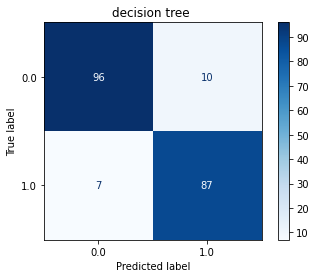

In [ ]:
cm1=confusion_matrix(y_test,predTree)
import matplotlib.pyplot as plt
print(cm1)
ConfusionMatrixDisplay.from_predictions(y_test,predTree,cmap="Blues")
plt.title("decision tree ")

In [ ]:

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


Accuracy :  0.915
Sensitivity :  0.9056603773584906
Specificity :  0.925531914893617


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ",( metrics.accuracy_score(y_test, predTree))*100)

DecisionTrees's Accuracy:  91.5


In [ ]:
print(classification_report(y_test,predTree))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       106
         1.0       0.90      0.93      0.91        94

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



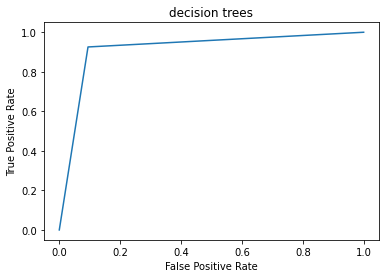

In [ ]:
y_pred_proba = drugTree.predict_proba(X_test)[::,1]        # drugTree is object of machine learning 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('decision trees')
plt.show()


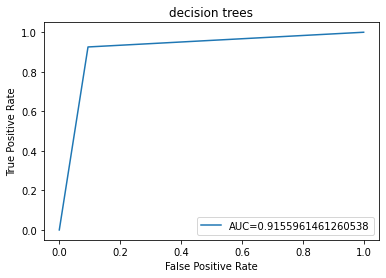

In [ ]:
y_pred_proba = drugTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('decision trees')
plt.legend(loc=4)
plt.show()

## svm

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
clf1 = svm.SVC(kernel='rbf')
clf1.fit(X_train, y_train) 

SVC()

In [ ]:
yhat_svm = clf1.predict(X_test)

In [ ]:
print(f"acuracy is { metrics.accuracy_score(y_test,yhat_svm)}")

acuracy is 0.86


Text(0.5, 1.0, 'svm')

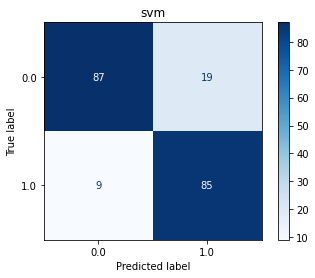

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,yhat_svm,cmap="Blues")
plt.title("svm")

In [ ]:
cm1=confusion_matrix(y_test,yhat_svm)
print(cm1)



[[87 19]
 [ 9 85]]


In [ ]:

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


Accuracy :  0.86
Sensitivity :  0.8207547169811321
Specificity :  0.9042553191489362


In [ ]:
print(classification_report(y_test,yhat_svm))

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       106
         1.0       0.82      0.90      0.86        94

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [ ]:
"""
y_pred_proba = clf1.predict_proba(X_test)[::,1]        # drugTree is object of machine learning 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
"""

"\ny_pred_proba = clf1.predict_proba(X_test)[::,1]        # drugTree is object of machine learning \nfpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)\n\n#create ROC curve\nplt.plot(fpr,tpr)\nplt.ylabel('True Positive Rate')\nplt.xlabel('False Positive Rate')\nplt.show()\n"

In [ ]:
"""
y_pred_proba = clf1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
"""

'\ny_pred_proba = clf1.predict_proba(X_test)[::,1]\nfpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)\nauc = metrics.roc_auc_score(y_test, y_pred_proba)\n\n#create ROC curve\nplt.plot(fpr,tpr,label="AUC="+str(auc))\nplt.ylabel(\'True Positive Rate\')\nplt.xlabel(\'False Positive Rate\')\nplt.legend(loc=4)\nplt.show()\n'

ada boost

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier()

In [ ]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
yhat_ada = ada_clf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(y_train,ada_clf.predict(X_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(y_test,yhat_ada)*100)

Train set Accuracy : 98.70689655172413
Test set Accuracy : 91.5


[[94 12]
 [ 5 89]]


Text(0.5, 1.0, 'adaboost')

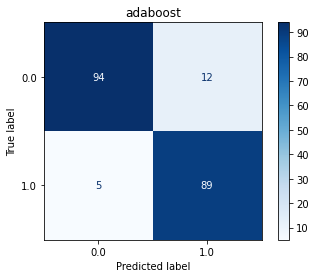

In [ ]:
cm1=confusion_matrix(y_test,yhat_ada)
print(cm1)
ConfusionMatrixDisplay.from_predictions(y_test,yhat_ada,cmap="Blues")
plt.title('adaboost')

In [ ]:



total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


Accuracy :  0.915
Sensitivity :  0.8867924528301887
Specificity :  0.9468085106382979


In [ ]:
print(classification_report(y_test,yhat_ada))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       106
         1.0       0.88      0.95      0.91        94

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



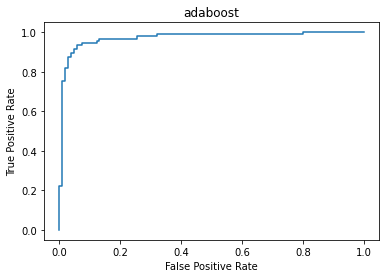

In [ ]:
y_pred_proba = ada_clf.predict_proba(X_test)[::,1]        # drugTree is object of machine learning 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('adaboost')
plt.show()


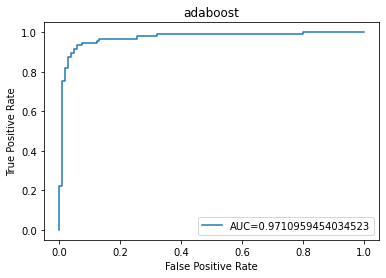

In [ ]:
y_pred_proba = ada_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('adaboost')
plt.legend(loc=4)
plt.show()

cat boost

In [ ]:
!pip install catboost
#!pip install ipywidgets

from catboost import CatBoostClassifier
model =CatBoostClassifier()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model.fit(X_train,y_train)

Learning rate set to 0.007422
0:	learn: 0.6845555	total: 14ms	remaining: 14s
1:	learn: 0.6776221	total: 29ms	remaining: 14.4s
2:	learn: 0.6699886	total: 41.1ms	remaining: 13.7s
3:	learn: 0.6615315	total: 52.2ms	remaining: 13s
4:	learn: 0.6541932	total: 63ms	remaining: 12.5s
5:	learn: 0.6476331	total: 73.2ms	remaining: 12.1s
6:	learn: 0.6399526	total: 84.7ms	remaining: 12s
7:	learn: 0.6329957	total: 96.4ms	remaining: 12s
8:	learn: 0.6253389	total: 107ms	remaining: 11.7s
9:	learn: 0.6193160	total: 118ms	remaining: 11.7s
10:	learn: 0.6129734	total: 130ms	remaining: 11.7s
11:	learn: 0.6071808	total: 142ms	remaining: 11.7s
12:	learn: 0.6006382	total: 149ms	remaining: 11.3s
13:	learn: 0.5943511	total: 161ms	remaining: 11.3s
14:	learn: 0.5897869	total: 172ms	remaining: 11.3s
15:	learn: 0.5839566	total: 187ms	remaining: 11.5s
16:	learn: 0.5779953	total: 205ms	remaining: 11.8s
17:	learn: 0.5715800	total: 217ms	remaining: 11.8s
18:	learn: 0.5662591	total: 228ms	remaining: 11.8s
19:	learn: 0.5608

In [ ]:
yhat_cat=model.predict(X_test)

In [ ]:
print('Train set Accuracy :',metrics.accuracy_score(y_train,model.predict(X_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(y_test,yhat_cat)*100)

Train set Accuracy : 100.0
Test set Accuracy : 95.5


[[100   6]
 [  3  91]]


Text(0.5, 1.0, 'catboost')

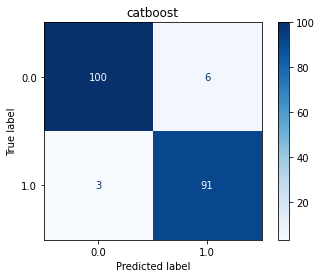

In [ ]:
cm1=confusion_matrix(y_test,yhat_cat)
print(cm1)
ConfusionMatrixDisplay.from_predictions(y_test,yhat_cat,cmap="Blues")
plt.title('catboost')

In [ ]:

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


Accuracy :  0.955
Sensitivity :  0.9433962264150944
Specificity :  0.9680851063829787


In [ ]:
print(classification_report(y_test,yhat_cat))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       106
         1.0       0.94      0.97      0.95        94

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



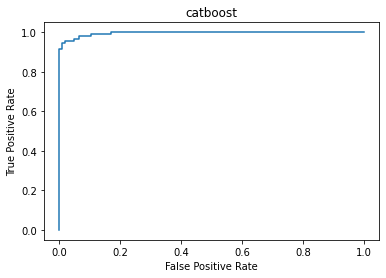

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]        # drugTree is object of machine learning 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('catboost')
plt.show()


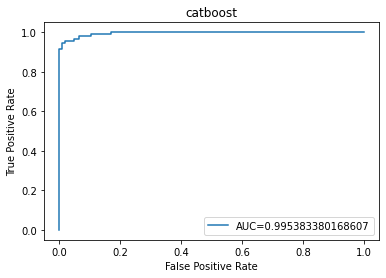

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('catboost')
plt.legend(loc=4)
plt.show()

## logitic regrssion 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR =LogisticRegression()

In [ ]:
LR =LogisticRegression().fit(X_train,y_train)

In [ ]:
yhat_lg = LR.predict(X_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(y_train,LR.predict(X_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(y_test,LR.predict(X_test))*100)

Train set Accuracy : 86.63793103448276
Test set Accuracy : 86.5


[[90 16]
 [11 83]]


Text(0.5, 1.0, 'logistic regrssion ')

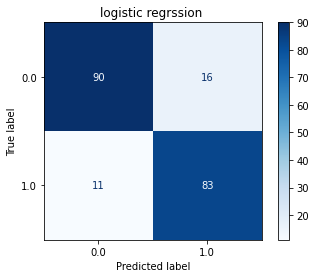

In [ ]:
cm1=confusion_matrix(y_test,yhat_lg)
print(cm1)
ConfusionMatrixDisplay.from_predictions(y_test,yhat_lg,cmap="Blues")
plt.title('logistic regrssion ')

In [ ]:

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


Accuracy :  0.865
Sensitivity :  0.8490566037735849
Specificity :  0.8829787234042553


In [ ]:
print(classification_report(y_test,yhat_lg))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       106
         1.0       0.84      0.88      0.86        94

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200



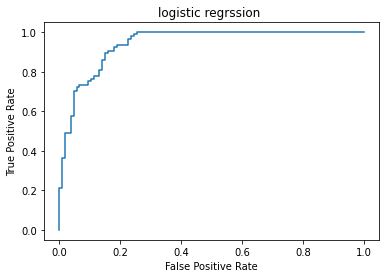

In [ ]:
y_pred_proba = LR.predict_proba(X_test)[::,1]        # drugTree is object of machine learning 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('logistic regrssion ')
plt.show()


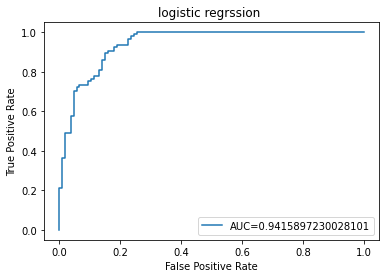

In [ ]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('logistic regrssion ')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc_clf = ExtraTreesClassifier()

In [ ]:
etc_clf.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
yhat_ExtraT = etc_clf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(y_train,etc_clf.predict(X_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(y_test,etc_clf.predict(X_test))*100)

Train set Accuracy : 100.0
Test set Accuracy : 96.5


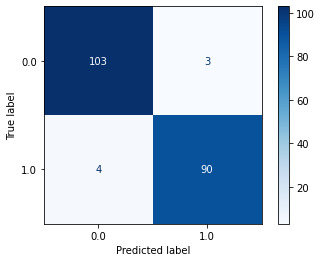

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,yhat_ExtraT,cmap="Blues")

[[103   3]
 [  4  90]]
Accuracy :  0.965
Sensitivity :  0.9716981132075472
Specificity :  0.9574468085106383
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       106
         1.0       0.97      0.96      0.96        94

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



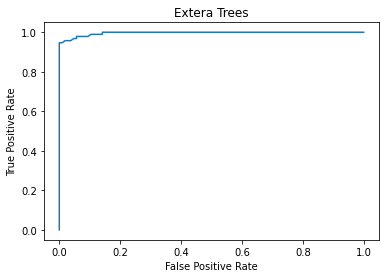

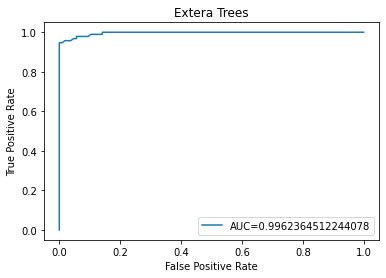

In [ ]:
cm1=confusion_matrix(y_test,yhat_ExtraT)
print(cm1)
#ConfusionMatrixDisplay.from_predictions(y_test,yhat_ExtraT,cmap="Blues")



total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


print(classification_report(y_test,yhat_ExtraT))

y_pred_proba = etc_clf.predict_proba(X_test)[::,1]        # drugTree is object of machine learning 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Extera Trees')

plt.show()


y_pred_proba = etc_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Extera Trees')

plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
BB_clf = BaggingClassifier()

In [ ]:
BB_clf.fit(X_train,y_train)
yhat_Ba = BB_clf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(y_train,BB_clf.predict(X_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(y_test,BB_clf.predict(X_test))*100)

Train set Accuracy : 98.92241379310344
Test set Accuracy : 96.0


In [ ]:
print(classification_report(y_test,yhat_Ba))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       106
         1.0       0.96      0.96      0.96        94

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



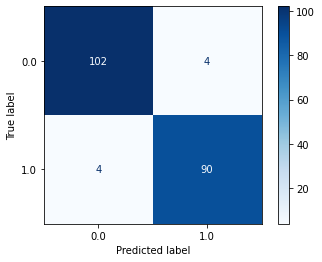

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,yhat_Ba,cmap="Blues")


[[102   4]
 [  4  90]]
Accuracy :  0.96
Sensitivity :  0.9622641509433962
Specificity :  0.9574468085106383
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       106
         1.0       0.96      0.96      0.96        94

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



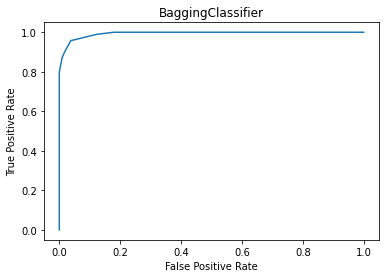

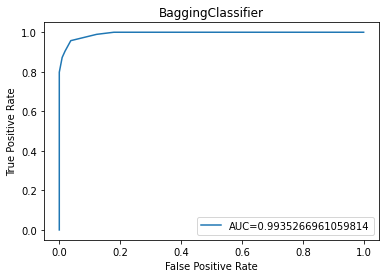

In [ ]:
cm1=confusion_matrix(y_test,yhat_Ba)
print(cm1)
#ConfusionMatrixDisplay.from_predictions(y_test,yhat_Ba,cmap="Blues")



total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


print(classification_report(y_test,yhat_Ba))

y_pred_proba = BB_clf.predict_proba(X_test)[::,1]        # drugTree is object of machine learning 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('BaggingClassifier')

plt.show()


y_pred_proba = BB_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('BaggingClassifier')

plt.show()

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
Hisg_clf =HistGradientBoostingClassifier()

In [ ]:
Hisg_clf.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [ ]:
yhat_HGBC = Hisg_clf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(y_train,Hisg_clf.predict(X_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(y_test,Hisg_clf.predict(X_test))*100)

Train set Accuracy : 100.0
Test set Accuracy : 94.5


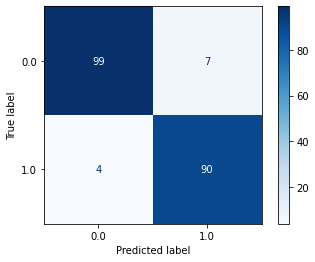

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,yhat_HGBC,cmap="Blues")


[[99  7]
 [ 4 90]]
Accuracy :  0.945
Sensitivity :  0.9339622641509434
Specificity :  0.9574468085106383
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       106
         1.0       0.93      0.96      0.94        94

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



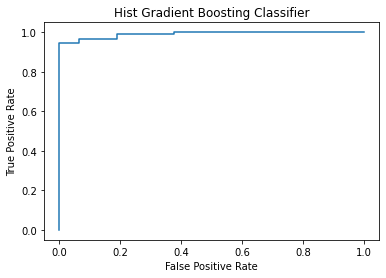

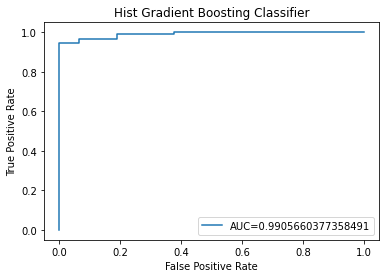

In [ ]:
cm1=confusion_matrix(y_test,yhat_HGBC)
print(cm1)
#ConfusionMatrixDisplay.from_predictions(y_test,yhat_HGBC,cmap="Blues")



total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


print(classification_report(y_test,yhat_HGBC))

y_pred_proba = Hisg_clf.predict_proba(X_test)[::,1]        # drugTree is object of machine learning 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Hist Gradient Boosting Classifier')

plt.show()


y_pred_proba = Hisg_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Hist Gradient Boosting Classifier')

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [ ]:
KNN.fit(X_train,y_train)
yhat_KNN = KNN.predict(X_test)


In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(y_train,KNN.predict(X_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(y_test,KNN.predict(X_test))*100)

Train set Accuracy : 90.08620689655173
Test set Accuracy : 90.0


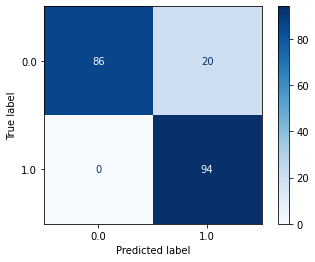

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,yhat_KNN,cmap="Blues")

[[86 20]
 [ 0 94]]
Accuracy :  0.9
Sensitivity :  0.8113207547169812
Specificity :  1.0
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90       106
         1.0       0.82      1.00      0.90        94

    accuracy                           0.90       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.92      0.90      0.90       200



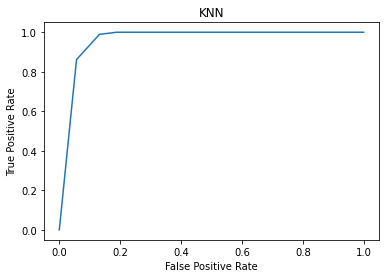

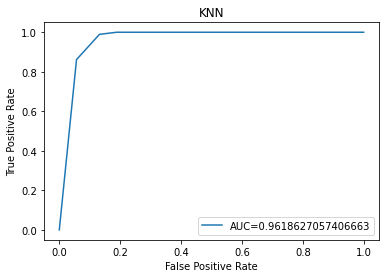

In [ ]:
cm1=confusion_matrix(y_test,yhat_KNN)
print(cm1)
#ConfusionMatrixDisplay.from_predictions(y_test,yhat_KNN,cmap="Blues")



total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


print(classification_report(y_test,yhat_KNN))

y_pred_proba = KNN.predict_proba(X_test)[::,1]        # drugTree is object of machine learning 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('KNN')

plt.show()


y_pred_proba = KNN.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('KNN')

plt.show()

In [ ]:
cnn_shape=X_train.shape[1]
print(cnn_shape)

14


# cnn

In [ ]:
X_train1 = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test1 = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation
from tensorflow import keras

In [ ]:
CNNch = 1
modelC2 = Sequential()

In [ ]:
modelC2.add(Conv1D(filters=200, kernel_size=3, padding='same',strides = 1, activation='relu', input_shape=(cnn_shape, CNNch)))
modelC2.add(Conv1D(filters=150, kernel_size=3, padding='same', activation='relu'))
modelC2.add(MaxPooling1D(pool_size=2))
modelC2.add(Conv1D(filters=120, kernel_size=3, padding='same', activation='relu'))
modelC2.add(Conv1D(filters=80, kernel_size=3, padding='same', activation='relu'))
modelC2.add(MaxPooling1D(pool_size=2))
modelC2.add(Conv1D(filters=50, kernel_size=3, padding='same',activation='relu'))
modelC2.add(Conv1D(filters=25, kernel_size=3, padding='same', activation='relu'))
modelC2.add(MaxPooling1D(pool_size=2))

In [ ]:
modelC2.add(Flatten())
modelC2.add(Dense(120, activation='relu'))
modelC2.add(Dense(100, activation='relu'))
modelC2.add(Dense(50, activation='relu'))
modelC2.add(Dense(25, activation='relu'))

modelC2.add(Dropout(0.5))
modelC2.add(Dense(2, activation='softmax'))

In [ ]:
modelC2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_49 (Conv1D)          (None, 14, 200)           800       
                                                                 
 conv1d_50 (Conv1D)          (None, 14, 150)           90150     
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 7, 150)           0         
 g1D)                                                            
                                                                 
 conv1d_51 (Conv1D)          (None, 7, 120)            54120     
                                                                 
 conv1d_52 (Conv1D)          (None, 7, 80)             28880     
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 3, 80)            0         
 g1D)                                                 

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
modelC2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = modelC2.fit(X_train1, y_train,  batch_size=20, epochs=40, validation_data=(X_test1, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/40
24/24 [==============================] - 4s 69ms/step - loss: 0.6703 - accuracy: 0.5927 - val_loss: 0.6065 - val_accuracy: 0.5400
Epoch 2/40
24/24 [==============================] - 1s 37ms/step - loss: 0.5411 - accuracy: 0.7543 - val_loss: 0.3582 - val_accuracy: 0.8500
Epoch 3/40
24/24 [==============================] - 1s 34ms/step - loss: 0.4132 - accuracy: 0.8470 - val_loss: 0.2940 - val_accuracy: 0.8650
Epoch 4/40
24/24 [==============================] - 1s 36ms/step - loss: 0.3486 - accuracy: 0.8728 - val_loss: 0.2437 - val_accuracy: 0.9000
Epoch 5/40
24/24 [==============================] - 1s 34ms/step - loss: 0.3382 - accuracy: 0.8707 - val_loss: 0.2948 - val_accuracy: 0.8900
Epoch 6/40
24/24 [==============================] - 1s 32ms/step - loss: 0.2957 - accuracy: 0.9030 - val_loss: 0.2085 - val_accuracy: 0.9000
Epoch 7/40
24/24 [==============================] - 1s 30ms/step - loss: 0.2837 - accuracy: 0.8858 - val_loss: 0.1913 - val_accuracy: 0.9100
Epoch 8/40
24

In [ ]:
accuracy =modelC2.evaluate(X_test1,y_test)
print('test Accuracy',accuracy)

7/7 [==============================] - 1s 11ms/step - loss: 0.4914 - accuracy: 0.9650
test Accuracy [0.49142390489578247, 0.9649999737739563]


In [ ]:
#data_final.to_csv("data final2")

In [ ]:
df.to_csv("amr")